In [1]:
#pwd

# Car DataSet Analysis
## A) Import Libraries
##### In this section we import all libraries used in this code.

In [2]:
#import
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#from 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn import metrics

## B) Load DataSet
##### In this section we load the data set to analyze. It must be noted that the data set was obtained from Kaggle. We also print some of the data set to observe the data.

In [4]:
md = pd.read_csv('./car data.csv')
md.head()
md.tail()


,Car Name,Year,Selling Price,Present Price,Kms Driven,Fuel Type,Seller Type,Transmission,Owner
296,city,2016,13300,16240.0,33988,Diesel,Dealer,Manual,0
297,brio,2015,5600,8260.0,60000,Petrol,Dealer,Manual,0
298,city,2009,4690,15400.0,87934,Petrol,Dealer,Manual,0
299,city,2017,16100,17500.0,9000,Diesel,Dealer,Manual,0
300,brio,2016,7420,8260.0,5464,Petrol,Dealer,Manual,0


In [5]:
md.shape

(301, 9)

## C) Initial Manipulation and Data Cleaning
##### In this section we manipulate and view the data in order to correctly analyse the data.

### 1) Check unique values in columns
##### Knowing that there are numerous models of cars, we investigate how many unique values are in the other columns. This is usefull to use later in our analysis; we also see if it's possible to use dummy variables.

In [6]:
print(md["Fuel Type"].unique())
print(md['Seller Type'].unique())
print(md.Transmission.unique())
print(md.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


### 2) Look for missing Values

##### We check for missing values and NaN values, necessary to adequately analyze the data.

In [7]:
md.isnull().sum()

Car Name         0
Year             0
Selling Price    0
Present Price    0
Kms Driven       0
Fuel Type        0
Seller Type      0
Transmission     0
Owner            0
dtype: int64

### 3) Observe values
##### We print a table of values relevant to our dataset; gives us better insight.

In [8]:
md.describe()

,Year,Selling Price,Present Price,Kms Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,6525.813953,10679.860465,36947.205980,0.043189
std,2.891554,7115.936179,12101.761563,38886.883882,0.247915
min,2003.000000,140.000000,448.000000,500.000000,0.000000
25%,2012.000000,1260.000000,1680.000000,15000.000000,0.000000
50%,2014.000000,5040.000000,8960.000000,32000.000000,0.000000
75%,2016.000000,8400.000000,13860.000000,48767.000000,0.000000
max,2018.000000,49000.000000,129640.000000,500000.000000,3.000000


### 4) Print columns values

In [9]:
md.columns

Index(['Car Name', 'Year', 'Selling Price', 'Present Price', 'Kms Driven',
       'Fuel Type', 'Seller Type', 'Transmission', 'Owner'],
      dtype='object')

#### 5) Modifying columns
##### In this section we add a new column to our data set and we delete a whole column not usefull to us. We add 'Age' (of the car), and we eliminate the 'Year' Column.

In [10]:
mdMod = md
del mdMod['Car Name']
#mdMod.head() #Uncomment to see process

mdMod['Age'] = 2020 - mdMod['Year']
#mdMod.head() #Uncomment to see process

mdMod.drop(['Year'], axis=1, inplace=True)
mdMod.head()

,Selling Price,Present Price,Kms Driven,Fuel Type,Seller Type,Transmission,Owner,Age
0,4690,7826.0,27000,Petrol,Dealer,Manual,0,6
1,6650,13356.0,43000,Diesel,Dealer,Manual,0,7
2,10150,13790.0,6900,Petrol,Dealer,Manual,0,3
3,3990,5810.0,5200,Petrol,Dealer,Manual,0,9
4,6440,9618.0,42450,Diesel,Dealer,Manual,0,6


### 6) Dummy Variables
##### Using 'get_dummies' we get the dummy variables for the columns with few but usefull values.

In [11]:
mdMod = pd.get_dummies(mdMod,drop_first=True)
mdMod.head()

,Selling Price,Present Price,Kms Driven,Owner,Age,Fuel Type_Diesel,Fuel Type_Petrol,Seller Type_Individual,Transmission_Manual
0,4690,7826.0,27000,0,6,0,1,0,1
1,6650,13356.0,43000,0,7,1,0,0,1
2,10150,13790.0,6900,0,3,0,1,0,1
3,3990,5810.0,5200,0,9,0,1,0,1
4,6440,9618.0,42450,0,6,1,0,0,1


## D) Initial Plots
##### We start to plot the data set to better vizualize the dataset.
### 1) SNS Plot

<Figure size 1440x1440 with 0 Axes>

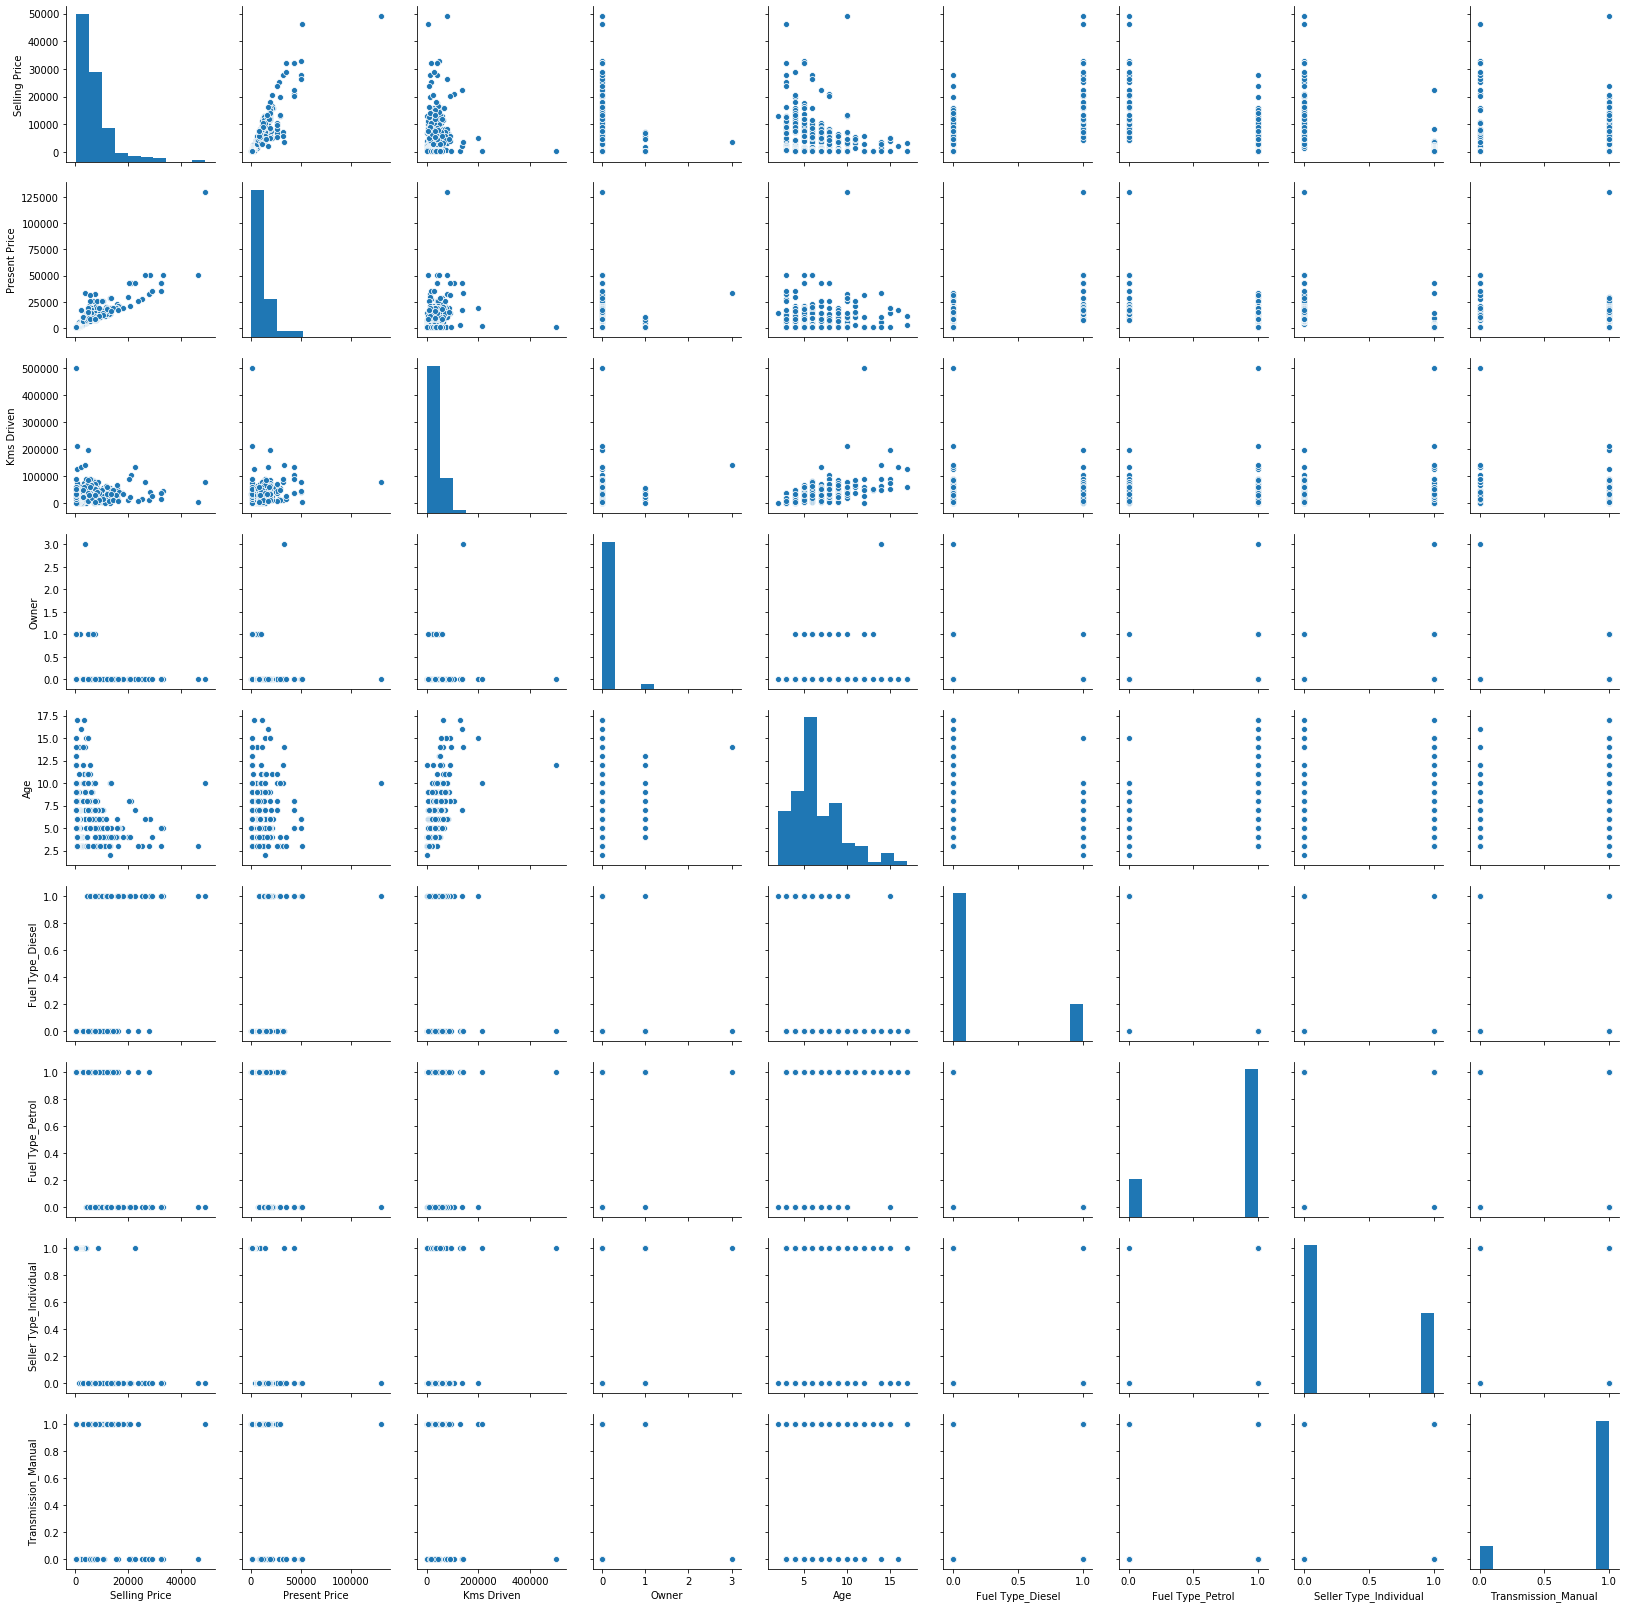

<Figure size 1440x1440 with 0 Axes>

In [12]:
sns.pairplot(mdMod)
plt.figure(figsize=(20,20))

### 2) Heat Plot

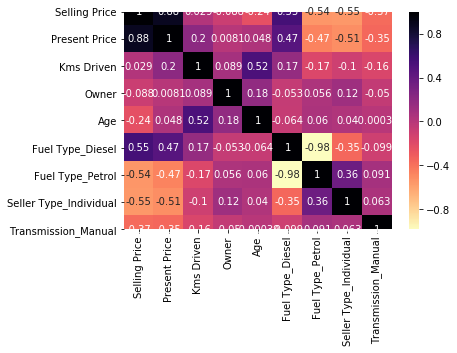

In [13]:
heat = mdMod.corr()
corrFeat = heat.index
g = sns.heatmap(mdMod[corrFeat].corr(), annot=True, cmap = "magma_r")
plt.rcParams["figure.figsize"] = (20,20)

### 3) Dependant and independant features

In [14]:
x = mdMod.iloc[:,1:]
y = mdMod.iloc[:,0]
x.head()

,Present Price,Kms Driven,Owner,Age,Fuel Type_Diesel,Fuel Type_Petrol,Seller Type_Individual,Transmission_Manual
0,7826.0,27000,0,6,0,1,0,1
1,13356.0,43000,0,7,1,0,0,1
2,13790.0,6900,0,3,0,1,0,1
3,5810.0,5200,0,9,0,1,0,1
4,9618.0,42450,0,6,1,0,0,1


In [15]:
y.head()

0     4690
1     6650
2    10150
3     3990
4     6440
Name: Selling Price, dtype: int64

### 4) Feature Importance Plot

C:\Users\jmoli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.49197725 0.04596417 0.00069443 0.0794028  0.13881103 0.02542448
 0.15517991 0.06254593]


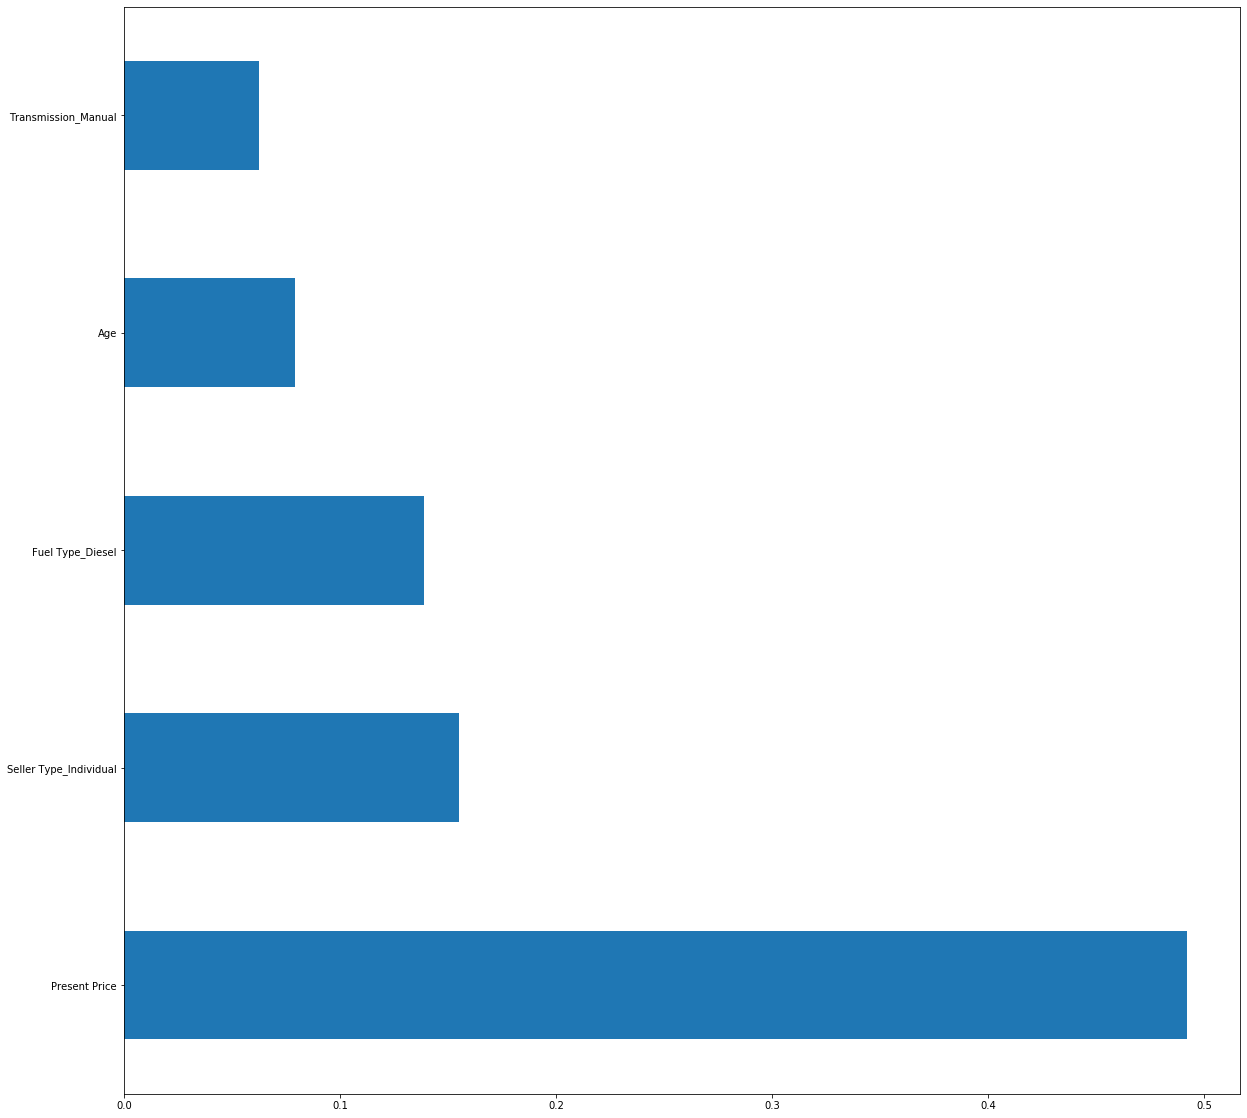

In [16]:
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_)
featImp = pd.Series(model.feature_importances_, index= x.columns)
featImp.nlargest(5).plot(kind='barh')
plt.rcParams["figure.figsize"] = (5,5)

## E) Models
#### 1) Initial Training

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ranfor = RandomForestRegressor() #Hyperparameters

#### 2) Randomized Search CV

In [18]:
# Number of trees in random forest.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split.
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree.
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node.
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node.
min_samples_leaf = [1, 2, 5, 10]

#### 3) Create the random grid
##### Use the random grid to search for best hyperparameters

In [19]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


#### 4) Random Forest Regresor

In [20]:
# First create the base model to tune.
rf = RandomForestRegressor()

#### 5) RandomizedSearchCV
##### Random search of parameters, using 3 fold cross validation.

In [21]:
# search across 100 different combinations.
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

#### 6) Model Training

In [22]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   33.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


#### 7) Printng Parameters

In [23]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

#### 8) Best Score

In [24]:
rf_random.best_score_

-7796669.489732795

#### 9) Plot Predictions

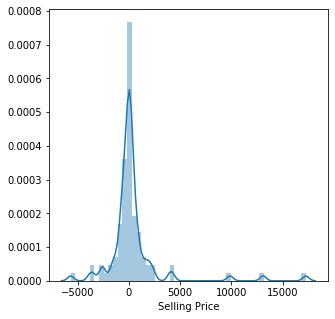

In [25]:
predictions=rf_random.predict(x_test)
sns.distplot(y_test-predictions)

#### 10) Ploting Predictions

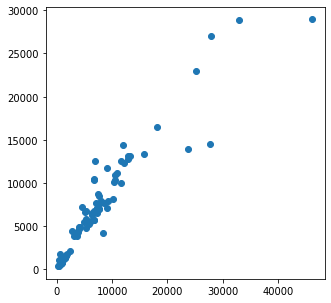

In [26]:
plt.scatter(y_test,predictions)

#### 11) Printing Errors

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1242.1334615384615
MSE: 8003168.971661171
RMSE: 2828.987269618082


## F) OUTPUT Files

In [28]:
# File to store data.
file = open('random_forest_regression_model.pkl', 'wb')

# File to dump information.
pickle.dump(rf_random, file)

In [29]:
print('Code Finished Executing')

Code Finished Executing
